<a href="https://colab.research.google.com/github/keerthana2610/Intro-to-ML-Project/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting the given data file
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading Data

In [ ]:
#creating dataframe
df = pd.read_csv("data.csv")

In [ ]:
df.head(5)

,City,Title,Text,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
0,Ghaziabad,"Minor molests mute girl, sent to observation home",GHAZIABAD: A 12-year-old boy was sent to an ob...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,10",NaN,3.0
1,Ghaziabad,Family out to buy car robbed of Rs 1 lakh by b...,GHAZIABAD: A family that had visited an automo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ghaziabad,"This gang posed as cops to extort youths, couples",GHAZIABAD: Five persons were arrested on Monda...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ghaziabad,"Residents object to loud music, thrashed in Gh...","Ghaziabad: Four tenants, including two soldier...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ghaziabad,Man kills self after being refused money for d...,GHAZIABAD: A 25-year-old allegedly committed s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pre-processing Dataset

In [ ]:
#dropping the columns that are of no use 
df=df.drop(["Title"],axis=1)
df=df.drop(["Text"],axis=1)

In [ ]:
df.head()

,City,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
0,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,10",NaN,3.0
1,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#filling all the null values with zero
df=df.fillna(0)

In [ ]:
df.describe()

,Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Number of adult victims,Number of childs invoved
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,0.040773,0.221030,0.111588,0.027897,0.021459,0.006438,0.263948,0.201717
std,0.271298,0.521029,0.371563,0.200201,0.184247,0.080063,0.513337,0.461504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,7.000000,4.000000,3.000000,3.000000,1.000000,5.000000,3.000000


In [ ]:
#changing the column headers for convenience
df.columns=["a","b","c","d","e","f","g","h","i","j","k"]

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       466 non-null    object 
 1   b       466 non-null    object 
 2   c       466 non-null    float64
 3   d       466 non-null    float64
 4   e       466 non-null    float64
 5   f       466 non-null    float64
 6   g       466 non-null    float64
 7   h       466 non-null    float64
 8   i       466 non-null    object 
 9   j       466 non-null    float64
 10  k       466 non-null    float64
dtypes: float64(8), object(3)
memory usage: 40.2+ KB
None


# City-wise crime analyzation

In [ ]:
#finding no.of cases in each city
city=df['a'].value_counts()
print(city)

Lucknow      202
Ghaziabad    167
Kanpur        97
Name: a, dtype: int64


In [ ]:
#convert the data into dataframe
city=pd.DataFrame({"Cities":city.index,"No.of Cases":city.values})
city.head()

,Cities,No.of Cases
0,Lucknow,202
1,Ghaziabad,167
2,Kanpur,97


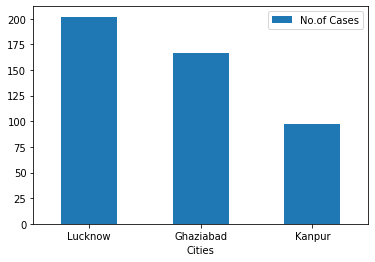

In [ ]:
a = city.plot.bar(x='Cities', y='No.of Cases', rot=0)

***Conclusion: Lucknow has the highest no.of cases***

# Reasons for Murder

In [ ]:
#finding no.of cases for each reason for murder
reason=df['b'].value_counts()
print(reason)

0                    319
Unknown reasons       40
Love Affairs          30
Petty Quarrels        19
Family Dispute        16
Personal Vendetta     16
Money Disputes        14
Property Disputes     10
Casteism               2
Name: b, dtype: int64


In [ ]:
#convert the data into dataframe
reason=pd.DataFrame({"Reasons":reason.index,"No.of Cases":reason.values})
reason=reason.drop(index=0)
reason.head()

,Reasons,No.of Cases
1,Unknown reasons,40
2,Love Affairs,30
3,Petty Quarrels,19
4,Family Dispute,16
5,Personal Vendetta,16


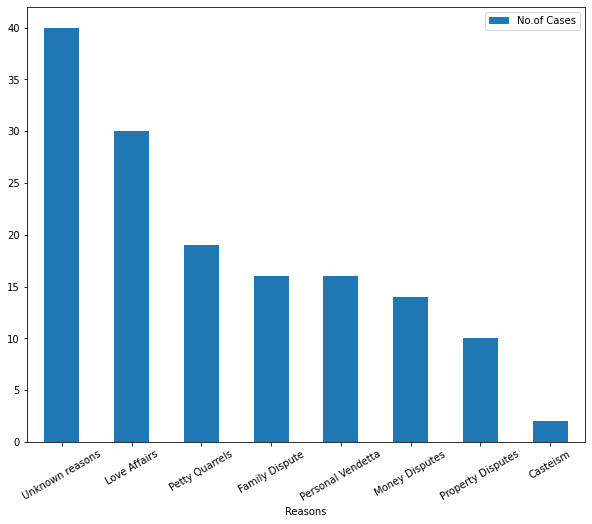

In [ ]:
b=reason.plot.bar(x='Reasons', y='No.of Cases',rot=30 ,figsize=(10,8))

***Conclusion: The reason for most murders is Love Affairs and the reason for least murders is Cateism***

# Crimes against Women

In [ ]:
#remove the value from the list if it is zero
crimes_list = df["i"].tolist()
crimes_list= [i for i in crimes_list if i!= 0]

In [ ]:
#split all the pairs and add them to the list
crimes = []
for i in crimes_list:
  if ',' in i:
    k=i.split(',')
    temp =[]
    for j in k:
      temp.append(int(j))
    crimes.append(temp)
  else:
    crimes.append(int(i))

In [ ]:
#li contains the no.of crimes commited against women divided act-wise
li = 11*[0]
for i in crimes:
  if type(i) == list:
    for j in i:
      li[j-1]= li[j-1]+1
  else:
    li[i-1]= li[i-1]+1

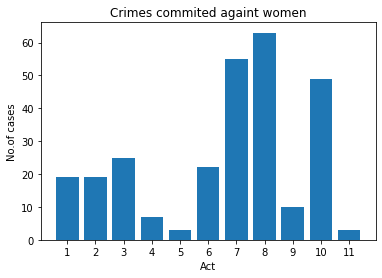

In [ ]:
x=[]
for i in range(len(li)):
  x.append(i+1)
plt.bar(x,li,tick_label=x)
plt.xlabel('Act')
plt.ylabel('No.of cases')
plt.title('Crimes commited againt women')
plt.show()

***Conclusion: Most common type of crime commited against women is " Assault on Women with Intent to Outrage her Modesty " (ACT 8)***


In [ ]:
#storing all the pairs to find relation between two acts in a 2 dimensional array
arr = [[0 for i in range(0,11)] for j in range(0,11)]
for i in crimes:
  if type(i)==list:
    for j in range(0,len(i)-1):
      for k in range(j+1,len(i)):
        y=i[j]-1
        z=i[k]-1
        arr[y][z]=arr[y][z]+1
        arr[z][y]=arr[z][y]+1
print(arr)

[[0, 0, 0, 2, 0, 0, 0, 0, 0, 7, 0], [0, 0, 5, 0, 0, 7, 0, 0, 0, 0, 0], [0, 5, 0, 0, 0, 4, 2, 4, 0, 1, 0], [2, 0, 0, 0, 0, 0, 3, 1, 0, 2, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 7, 4, 0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 2, 3, 0, 0, 0, 2, 2, 28, 0], [0, 0, 4, 1, 0, 1, 2, 0, 1, 9, 0], [0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0], [7, 0, 1, 2, 0, 0, 28, 9, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


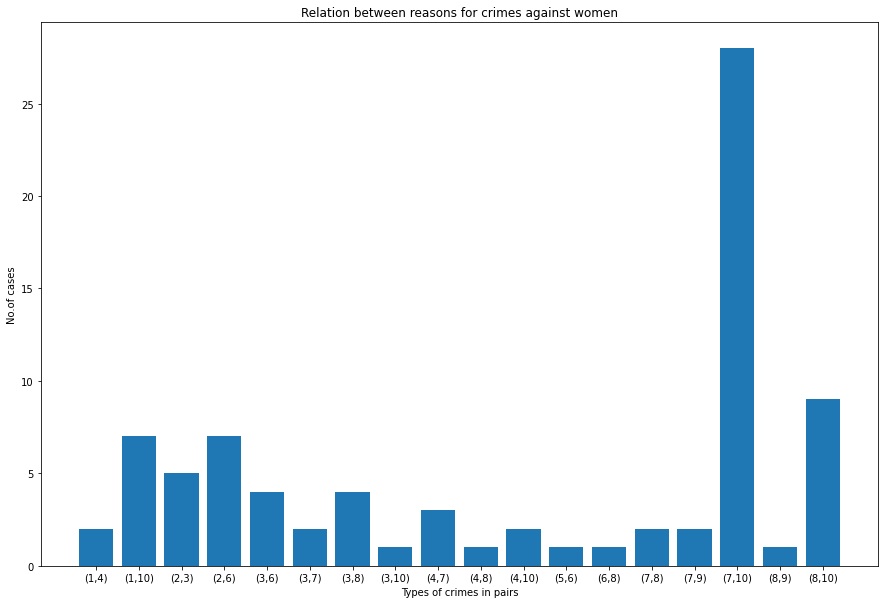

In [ ]:
y=[]
x=[]
for i in range(0,11):
  for j in range(i+1,11):
    if arr[i][j] !=0 :
      y.append(arr[i][j])
      x.append("("+str(i+1)+","+str(j+1)+")")
a=[]      
for i in range(0,len(x)):
  a.append(i+1)    
fig = plt.figure(figsize =(15, 10))  
plt.bar(a,y,tick_label=x)
plt.xlabel('Types of crimes in pairs')
plt.ylabel('No.of cases')
plt.title('Relation between reasons for crimes against women')
plt.show()

***Conclusion: Act 7 and Act 10 occur together the most. 
They are the most related pair in all these crimes.***

# Victims due to murder

In [ ]:
#various reasons for murder are listed out
reasons_list = df["b"].tolist()
reasons_list= [i for i in reasons_list if i!= 0]
reasons_list = list(set(reasons_list))
print(reasons_list)

['Love Affairs', 'Casteism', 'Family Dispute', 'Personal Vendetta', 'Property Disputes', 'Unknown reasons', 'Petty Quarrels', 'Money Disputes']


In [ ]:
#no.of child, male and female victims due to murder are noted
Dict = {}
for i in reasons_list:
  Dict[i] = [0,0,0]
for i in df.index:
  if df["b"][i]!=0:
    Dict[df["b"][i]][0]=Dict[df["b"][i]][0]+df["c"][i]
    Dict[df["b"][i]][1]=Dict[df["b"][i]][1]+df["d"][i]
    Dict[df["b"][i]][2]=Dict[df["b"][i]][2]+df["e"][i]
print(Dict)   


{'Love Affairs': [0.0, 14.0, 16.0], 'Casteism': [0.0, 1.0, 1.0], 'Family Dispute': [7.0, 5.0, 8.0], 'Personal Vendetta': [0.0, 14.0, 2.0], 'Property Disputes': [0.0, 15.0, 5.0], 'Unknown reasons': [7.0, 29.0, 15.0], 'Petty Quarrels': [1.0, 13.0, 5.0], 'Money Disputes': [4.0, 12.0, 0.0]}


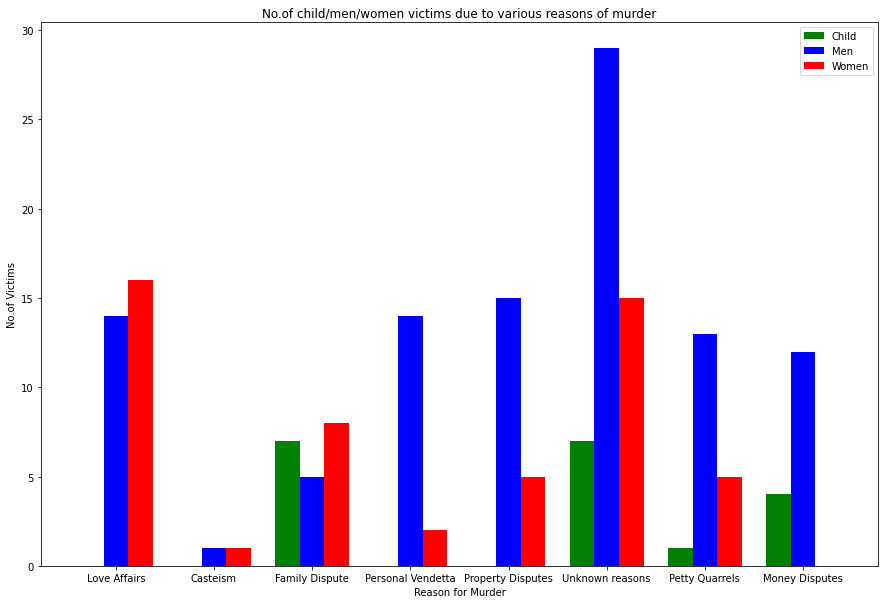

In [ ]:
#Plotting the reason of murder and type of victims
N = len(Dict.keys())
i= np.arange(N) 
width = 0.25
child=[]
men=[]
women=[]
for key, value in Dict.items():
  child.append(value[0])
  men.append(value[1])
  women.append(value[2])
fig = plt.figure(figsize =(15, 10))    
bar1 = plt.bar(i,child, width, color='g')
bar2 = plt.bar(i+width,men, width, color='b')
bar3 = plt.bar(i+width*2,women, width, color='r')
plt.xticks(i+width,list(Dict.keys()))
plt.legend( (bar1, bar2, bar3), ('Child', 'Men', 'Women') )
plt.xlabel("Reason for Murder")
plt.ylabel("No.of Victims")
plt.title("No.of child/men/women victims due to various reasons of murder")
plt.show()


***Conclusion: Highest no.of victims are women due to a particular reason for murder(Love Affairs). As a whole the highest no.of victims due to murder are men.***


# Kidnapping report

In [ ]:
#find the no.of victims in kidnapping category-wise(child/men/women)
child = df['f'].sum()
men = df['g'].sum()
women = df['h'].sum()

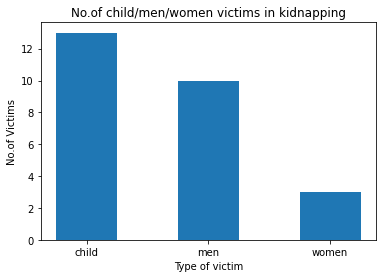

In [ ]:
plt.bar([1,2,3],[child,men,women],tick_label=["child","men","women"],width=0.5)
plt.xlabel("Type of victim")
plt.ylabel("No.of Victims")
plt.title("No.of child/men/women victims in kidnapping")
plt.show()

***Conclusion: Children are the highest no.of victims in kidnapping***